In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import os
import re

# Mostra o diretório atual e os arquivos na pasta datasets
print("Diretório atual:", os.getcwd())
print("Arquivos na pasta datasets:", os.listdir("datasets"))

# Leitura do CSV
try:
    df = pd.read_csv("datasets/phishing_transformed.csv", encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv("datasets/phishing_transformed.csv", encoding="ISO-8859-1")

df


Diretório atual: C:\Users\Bruno\OneDrive\TCC\PythonProject
Arquivos na pasta datasets: ['DDoS.csv', 'phishing.csv', 'phishing_transformed.csv', 'ransomware.csv']


,Unnamed: 0,Email Type_Phishing Email,000000000012735,01,1,26,4,8,a,access,...,was,well,when,will,with,would,write,www,you,your
0,18646,True,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,1
1,18647,False,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
2,18648,False,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,0,0,1,0
3,18649,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18650,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Verifica colunas não numéricas
colunas_nao_numericas = df.select_dtypes(include=['object']).columns.tolist()
colunas_nao_numericas

[]

Top 10 variáveis mais importantes:
please        0.038564
on            0.027926
empty         0.027187
of            0.026005
chance        0.026005
kind          0.023197
anita         0.022459
housewifes    0.021277
research      0.021277
sent          0.020981
dtype: float64


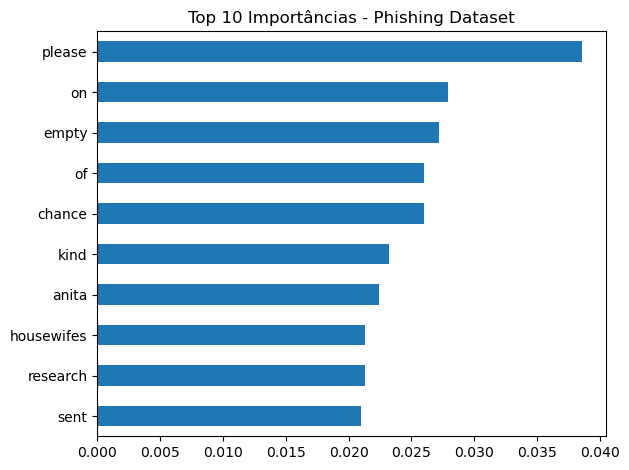

In [5]:
# Define variável alvo
if 'Email Type_Phishing Email' in df.columns:
    y = df['Email Type_Phishing Email']
    X = df.drop(columns=['Email Type_Phishing Email'])
else:
    raise ValueError("Coluna alvo 'Email Type_Phishing Email' não encontrada.")

# Treina modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X, y)

# Calcula importâncias
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False)

# Exibe top 10
print("Top 10 variáveis mais importantes:")
print(importancias.head(10))

# Gráfico
importancias.head(10).plot(kind='barh')
plt.title("Top 10 Importâncias - Phishing Dataset")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()